In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = 4
n = 10
eta = 1e-5
alpha = 0.01
beta = 0.5
A = np.random.normal(0,1,(m,n))

In [2]:
def compute_gradient(x):
    grad = np.zeros(len(x))
#    grad = A.T@(1/(1-A@x)) + 1/(1-x) - 1/(1+x)
    for j in range(n):
        for i in range(m):
            grad[j] += A[i,j]/(1-A[i,:]@x)
        grad[j] += 2*x[j]/(1-x[j]**2)
    return grad

In [3]:
compute_gradient(np.zeros(n))

array([ 1.08788168, -2.1965042 ,  2.09090858,  1.58934495, -4.30716232,
        0.05992645, -1.35430297,  0.36332145, -2.01466777,  1.26692855])

In [4]:
def f(x):
#    return -np.sum(np.log(1-A@x)) -np.sum(np.log(1 - x**2))
    total = 0
    for i in range(m):
        total -= np.log(1 - A[i,:]@x)
    for i in range(n):
        total -= np.log(1 - x[i]**2)
    return total

In [5]:
def stop_condition(grad,eta):
    return np.linalg.norm(grad) > eta

In [6]:
f(np.zeros(n))

0.0

In [7]:
def line_Search(v,alpha,beta,x):
    t = 1
    #include restrictions i.e. the domain
    while np.max(A@(x + t*v))>=1 or np.max(np.abs(x + t*v))>=1:
        t *=beta
    grad = compute_gradient(x)
    while f(x+t*v) > f(x) + alpha*t*(grad.dot(v)):
        t *= beta
    return t

/tmp/ipykernel_8058/2471826051.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,20)


(0.7079812002696424, 20)

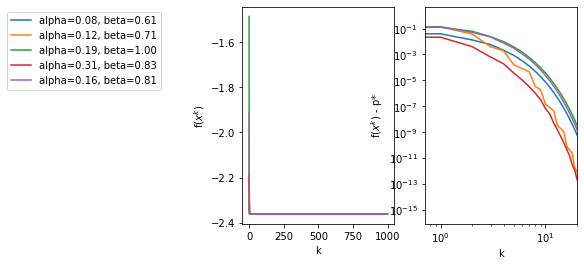

In [8]:
fig,axs = plt.subplots(1,2)
for _ in  range(5):
    x = np.zeros(n)
    grad = compute_gradient(x)
    alpha = np.random.uniform(0.01,0.5)
    beta = np.random.uniform(0.5,1)
    i = 0
    y = []
    while stop_condition(grad,eta) and i < 1000:
        v = -1*compute_gradient(x)
        t = line_Search(v,alpha,beta,x)
        x += t*v
        y.append(f(x))
        i+=1
    axs[0].plot(y,label=f"alpha={alpha:.2f}, beta={beta:.2f}")
    axs[1].plot([np.abs(y[i] - y[-1]) for i in range(len(y))],
                label=f"alpha={alpha:.2f}, beta={beta:.2f}")
axs[0].set_xlabel("k")
axs[0].set_ylabel("f($x^k$)")
axs[0].legend(bbox_to_anchor=(-0.5, 1))
axs[1].set_xlabel("k")
axs[1].set_ylabel("f($x^k$) - p*")
axs[1].loglog()
plt.xlim(0,20)

In [9]:
x

array([-0.31691766,  0.37151406, -0.35078913, -0.25369276,  0.52053911,
        0.0152997 ,  0.28685222,  0.02391777,  0.35096954, -0.12646262])

# Usando método de Newton

In [10]:
def compute_Hessian(x):
    hess = np.zeros((len(x),len(x)))
#    grad = A.T@(1/(1-A@x)) + 1/(1-x) - 1/(1+x)
#     for j in range(n):
#         for i in range(m):
#             hess[j,j] -= (A[i,j]/(1-A[i,:]@x))**2
#         hess[j,j] += 2/(1-x[j]**2) + (2*x[j]/(1-x[j]**2))**2
    d = 1/(1-A@x)
    hess = A.T@np.diag(d**2)@A + np.diag(1/(1+x)**2 + 1/(1-x)**2)
    return hess

In [11]:
def compute_Newton_step(x):
    hess = compute_Hessian(x)
    grad = compute_gradient(x)
    #hess_inv = np.diag(1/np.diag(hess))
    hess_inv = np.linalg.inv(hess)
    step = hess_inv@grad
    lambda_ = grad.dot(step)
    return -step, lambda_ 

In [12]:
def stop_condition_NT(lambda_,epsilon):
    return lambda_ > epsilon

Text(0, 0.5, 'f($x^k$) - p*')

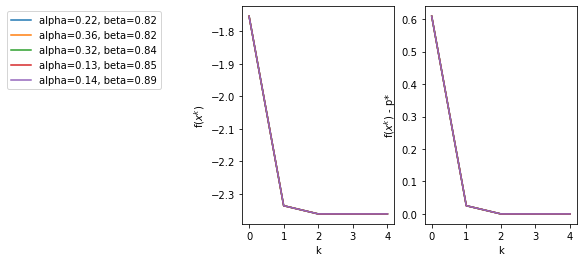

In [13]:
epsilon = eta**2
fig,axs = plt.subplots(1,2)
for _ in range(5):
    x = np.zeros(n)
    v, l = compute_Newton_step(x)
    alpha = np.random.uniform(0.01,0.5)
    beta = np.random.uniform(0.5,1)
    i = 0
    y = []
    while stop_condition_NT(l,epsilon) and i < 1000:
        v, l = compute_Newton_step(x)
        t = line_Search(v,alpha,beta,x)
        x += t*v
        y.append(f(x))
        i+=1
    axs[0].plot(y,label=f"alpha={alpha:.2f}, beta={beta:.2f}")
    axs[1].plot([np.abs(y[i] - y[-1]) for i in range(len(y))],
                label=f"alpha={alpha:.2f}, beta={beta:.2f}")
axs[0].set_xlabel("k")
axs[0].set_ylabel("f($x^k$)")
axs[0].legend(bbox_to_anchor=(-0.5, 1))
axs[1].set_xlabel("k")
axs[1].set_ylabel("f($x^k$) - p*")